In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1
a) Load house sales data from file kc_house_data.csv, print first records.  
b) Print the variable list. Select categorical and numerical variables.  
c) Compute basic statistics of numerical variables. Are all of them meaningful?

In [ ]:
#a)
#Your code:
data = pd.read_csv('kc_house_data.csv')
data.head()

#Hint: read_csv(), head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
"""
We can notice that the most of few firsts records have sqft_living greater than 1000, every of firsts records
have a lot bigger or equal than 5000 sqft and that not any of the houses have a basement.
"""

In [ ]:
#b) 

index = data.columns
data[['zipcode', 'waterfront', 'view', 'condition', 'grade','id' ]] = data[['zipcode', 'waterfront', 'view', 'condition', 'grade', 'id']].astype(object)
data[['date']] = data[['date']].astype('datetime64')

house_categorical_df = data.select_dtypes(include=[np.object, np.datetime64]).columns
house_numerical_df = data.select_dtypes(include=[np.float64,np.int64]).columns

print(data.columns)


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:
"""
We can see that the dataset have attributes like id, data, price, quantity of individual rooms in the house etc.
We are able to extract the numerical and categorical attributes from them.
"""

In [ ]:
#c)
#Your code:

perc =[.25, .50, .75] 

include = ['float', 'int']
 
desc = data.describe(percentiles = perc, include = include)

desc


#Hint: Function describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
"""
Based on the results, we can notice that the house has an average 3 bedrooms, 2 bathrooms, but also a few of them don't 
even have bathroom or bedroom, whereas some have 33 bedrooms or 8 bathrooms.
We can also notice that minimal price of the house is 100 times lesser than the most expensive one.
"""

## Exercise 2
Using scatter plot:  
a) Show the relation of square footage and price.  
b) Check how price is influenced by apartment's grade. Find other variables correlated with price.  
c) Check how good apartments are distributed over the city. First, plot zipcode versus price. Then, use apartments coordinates (longitude and lattitude) in order to show where apartments of good grade are located. 

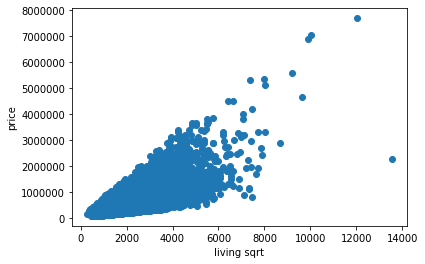

In [ ]:
#a)
#Your code:
import matplotlib.pyplot as plt

living = data['sqft_living']
cost = data['price']

plt.xlabel('living sqrt')
plt.ylabel('price')
plt.ticklabel_format(axis='y', style="plain")
plt.scatter(living, cost)
plt.show()

#Hint plt.scatter

In [ ]:
"""
Based on the plot we can notice that the price grows with the living space in most cases. Also, the fact is that
'the top' part of the plot grows faster than 'the low' part. In means that there are some houses, which are bigger than other,
but cost the same.
"""

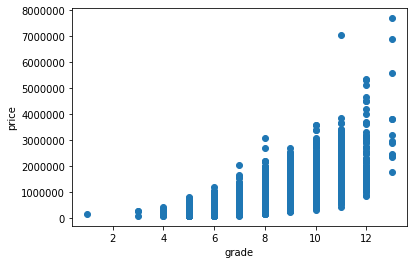

In [ ]:
#b)
#Your code:

grade = data['grade']

plt.xlabel('grade')
plt.ylabel('price')
plt.scatter(grade, cost)
plt.ticklabel_format(axis='y', style="plain")
plt.show()


In [ ]:
"""
The plot shows that 'grade' grows with the price, but there are some cases, where house has high grade, 
but the price is relatively low.
"""

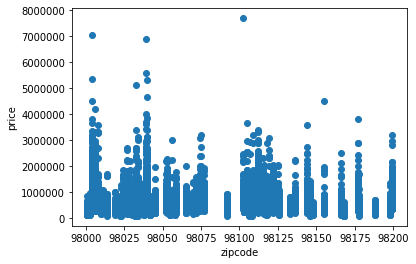

In [ ]:
#c)
#Your code:
zipcode = data['zipcode']

plt.xlabel('zipcode')
plt.ylabel('price')
plt.scatter(zipcode, cost)
plt.ticklabel_format(axis='y', style="plain")
plt.show()


In [ ]:
"""
We can see that there are some special points, where the most houses are sold and most of the most expensive houses
are placed in locations with zip-code: 99800 and 98035
"""

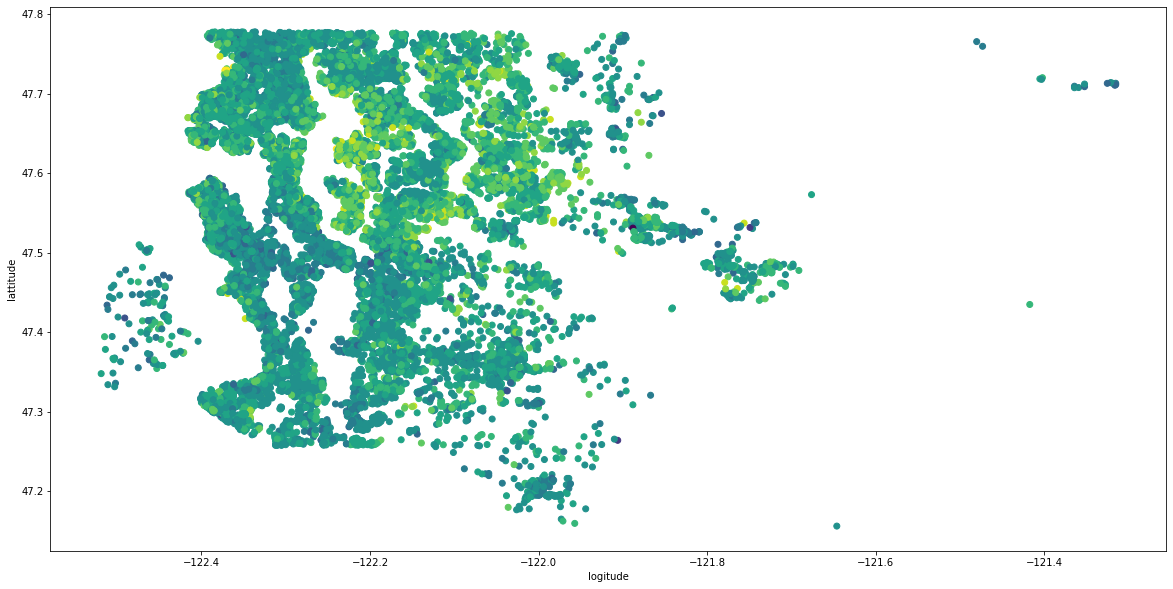

In [ ]:
#Your code:
lattitude = data['lat']
longitude = data['long']

plt.xlabel('logitude')
plt.ylabel('lattitude')
plt.scatter(longitude, lattitude,None,grade)
plt.rcParams["figure.figsize"] = (20,10)

plt.show()



In [ ]:
"""
Most of houses with the best grades are located in coordinates (-122,2 - 122.0)x(47.5 - 47.7)
"""

## Exercise 3
a) Create boxplot of apartment's grade versus it's price. Compare with plot 2b).  
b) Create mosaic plot of any two categorical variables.

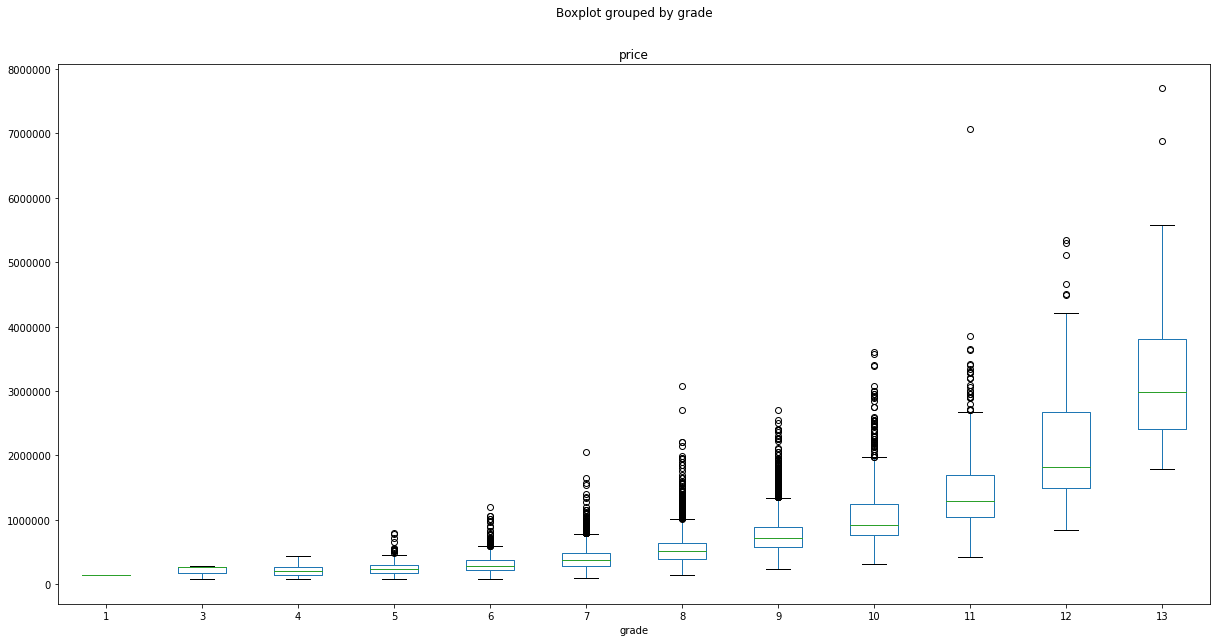

In [ ]:
#a)
#Your code:

data.boxplot(column='price',by='grade', grid=False).ticklabel_format(axis='y', style="plain")


#Hint: plt.boxplot

In [ ]:
"""
Based on boxplot we can notice that there are a lot of outliers to the grade of 11.
"""

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


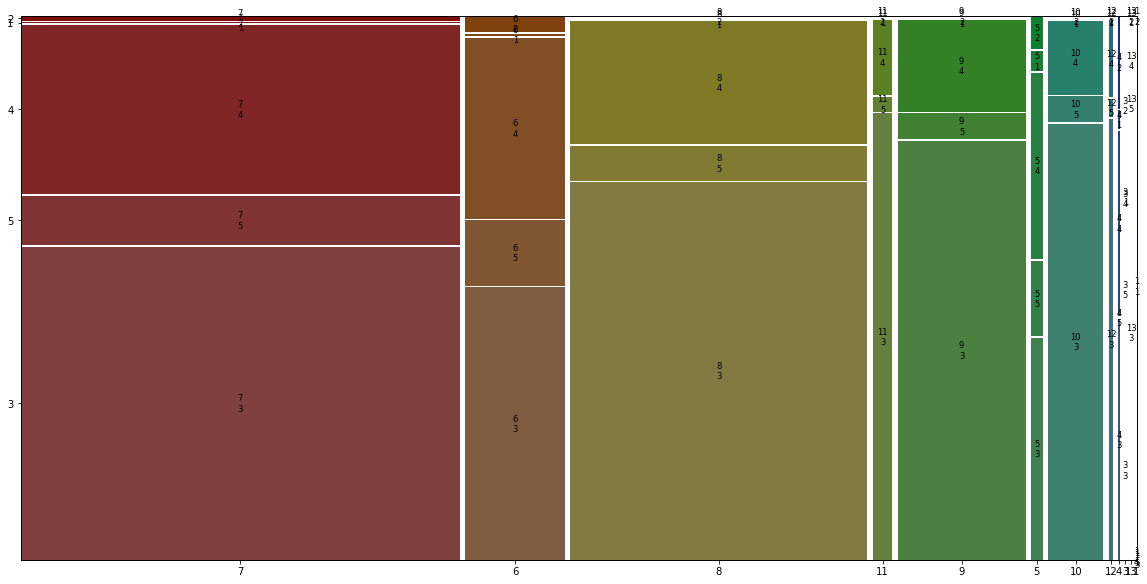

In [ ]:
#b)
from statsmodels.graphics.mosaicplot import mosaic

#Your code:

mosaic(data, ['grade','condition'])
plt.show()

In [ ]:
"""
Based on the mosaic it can be concluded that there are the most cases, where grade is equal to 7
and condition to 3 or grade is equal to 8 and condition to 3.
"""

## Exercise 4
"I am interested in the house with 3 bedrooms, 2 bathrooms and 2 floors"  
a) Compute the basic statistics of apartments fulfilling above constraints.  
b) Distinct accepted apartments on any of previously created plots.  
c) Find such apartments with best price to footage ratio.  

In [ ]:
#a)
#Your code:

df = pd.DataFrame(data)
newData = df.loc[(df['bedrooms']== 3) & (df['bathrooms'] == 2) & (df['floors'] == 2)]

perc =[.25, .50, .75] 

include = ['float', 'int']

desc = newData.describe(percentiles = perc, include = include) 

desc

#Hint: pandas.DataFrame.loc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,1.540000e+02,154.0,154.0,154.000000,154.000000,154.0,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,5.144986e+05,3.0,2.0,1850.279221,23678.948052,2.0,1717.422078,132.857143,1969.779221,284.863636,47.567376,-122.247091,1802.337662,17545.123377
std,2.497661e+05,0.0,0.0,547.585413,83324.024708,0.0,527.473851,248.092631,34.654456,700.057328,0.143221,0.150507,453.210930,40404.134611
min,2.090000e+05,3.0,2.0,1020.000000,700.000000,2.0,720.000000,0.000000,1900.000000,0.000000,47.194700,-122.519000,850.000000,886.000000
25%,3.769750e+05,3.0,2.0,1452.500000,3414.750000,2.0,1402.500000,0.000000,1942.250000,0.000000,47.498800,-122.361750,1452.500000,4020.000000
50%,4.640000e+05,3.0,2.0,1700.000000,5868.500000,2.0,1625.000000,0.000000,1984.500000,0.000000,47.584750,-122.299500,1725.000000,6278.000000
75%,5.894625e+05,3.0,2.0,2127.500000,10800.250000,2.0,1977.500000,207.500000,1997.500000,0.000000,47.682400,-122.149250,2117.500000,10392.250000
max,1.755000e+06,3.0,2.0,3650.000000,843309.000000,2.0,3650.000000,1120.000000,2014.000000,2014.000000,47.777000,-121.709000,3170.000000,273992.000000


In [ ]:
"""
There are 154 records which meeting the constraints. The minimum price of the house is 10 times lower than
the maximal one. The average price of the house is 514498,6.
"""

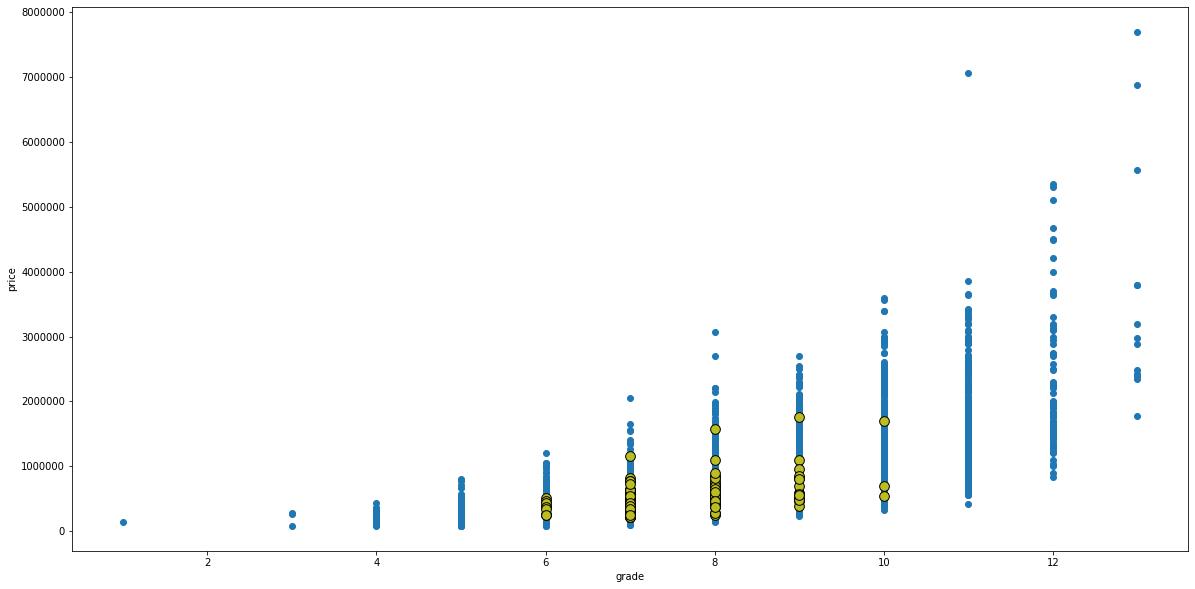

In [ ]:
#b)
#Your code:
grade = data['grade']

plt.xlabel('grade')
plt.ylabel('price')
plt.scatter(grade, cost)
plt.rcParams["figure.figsize"] = (15,7)
plt.scatter(newData[['grade']], newData[['price']], np.pi*30, '#bcbd22', edgecolors = 'black')
plt.ticklabel_format(axis='y', style="plain")
plt.show()


In [ ]:
"""
Based on the plot it can be concluded that all houses, which meeting the requirements have grade 
in the range of 6 to 10.
"""

In [ ]:
#c)
#Your code:
X = newData['price'] 
Y = newData['sqft_living']

ratio =  X / Y 

data =  data.assign( mean = ratio)

data.sort_values(by = ['mean']).head()

#Hint: .loc, .sort_values(), .index

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,mean
9704,7452500565,2014-08-29,260000.0,3,2.0,2710,5000,2.0,0,0,3,6,2710,0,1951,0,98126,47.5188,-122.373,850,5000,95.940959
11258,7937600262,2014-07-10,379900.0,3,2.0,3110,44967,2.0,0,0,3,9,3020,90,1999,0,98058,47.4343,-122.082,2150,44967,122.154341
19880,3832050860,2015-03-19,210000.0,3,2.0,1580,4961,2.0,0,0,3,7,1580,0,2006,0,98042,47.3338,-122.053,2280,5000,132.911392
16014,5104450440,2014-11-13,252500.0,3,2.0,1810,10684,2.0,0,0,3,8,1810,0,1987,0,98058,47.4619,-122.153,2140,9657,139.502762
20906,3355400242,2014-10-28,274900.0,3,2.0,1936,6612,2.0,0,0,3,7,1936,0,2014,0,98001,47.2602,-122.246,1620,21600,141.993802


In [ ]:
"""
Cost of the best result is 95 per sqft, others are in range of 122 to 141 per sqft.
"""